In [5]:

install.packages("tidyverse")  # For data manipulation and visualization
install.packages("readr")      # For reading CSV files
install.packages("dplyr")      # For data manipulation
install.packages("ggplot2")    # For plotting
install.packages('readxl')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
library(readr)
library(dplyr)

data <- read_csv("/content/sample_data/debugging.csv")
summary(data)
# mean and standard deviation
mean_seconds <- mean(data$Seconds)
sd_seconds <- sd(data$Seconds)

# Display
cat("Mean (μ):", mean_seconds, "\n")
cat("Standard Deviation (σ):", sd_seconds, "\n")

Rows: 40 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Language, IDE
dbl (2): Subject, Seconds

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


    Subject        Language             IDE               Seconds       
 Min.   : 1.00   Length:40          Length:40          Min.   :  331.4  
 1st Qu.: 5.75   Class :character   Class :character   1st Qu.: 1676.8  
 Median :10.50   Mode  :character   Mode  :character   Median : 3086.8  
 Mean   :10.50                                         Mean   : 3984.5  
 3rd Qu.:15.25                                         3rd Qu.: 5055.5  
 Max.   :20.00                                         Max.   :18066.0  

Mean (μ): 3984.496 
Standard Deviation (σ): 3678.875 


In [26]:
# Perform the Shapiro-Wilk test
shapiro_test_result <- shapiro.test(data$Seconds)
print(shapiro_test_result)

# Interpretation
if(shapiro_test_result$p.value < 0.05) {
    cat("The variable Seconds is not normally distributed (p < 0.05).")
} else {
    cat("The variable Seconds is normally distributed (p >= 0.05).")
}


	Shapiro-Wilk normality test

data:  data$Seconds
W = 0.7762, p-value = 2.241e-06

The variable Seconds is not normally distributed (p < 0.05).

In [27]:
library(dplyr)

# Adding a new column with log-transformed values
data <- data %>%
  mutate(log_Seconds = log(Seconds))

# Display the first few rows to confirm the new column
head(data)

Subject,Language,IDE,Seconds,log_Seconds
<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,C#,VisualStudio,2717.862,7.907601
1,C#,Eclipse,1342.153,7.202030
2,Java,VisualStudio,1552.054,7.347334
2,Java,Eclipse,1407.076,7.249269
3,C#,VisualStudio,3332.963,8.111617
3,C#,Eclipse,2274.291,7.729424


In [50]:
# Shapiro-Wilk Test on the log-transformed data
shapiro_result_log <- shapiro.test(data$log_Seconds)

# Print the result
print(shapiro_result_log)

# Interpretation of the results
if(shapiro_result_log$p.value < 0.05) {
    cat("The log-transformed variable 'log_Seconds' is not normally distributed (p-value <", shapiro_result_log$p.value, ").\n")
} else {
    cat("The log-transformed variable 'log_Seconds' appears to be normally distributed (p-value =", shapiro_result_log$p.value, ").\n")
}



	Shapiro-Wilk normality test

data:  data$log_Seconds
W = 0.97125, p-value = 0.3938

The log-transformed variable 'log_Seconds' appears to be normally distributed (p-value = 0.3938062 ).


In [32]:
library(dplyr)
library(ggplot2)

# Performing a t-test to compare the mean log-transformed seconds between the two IDEs
data$log_Seconds <- log(data$Seconds)

# Filter data for C# and Java separately
data_csharp <- data %>% filter(Language == "C#")
data_java <- data %>% filter(Language == "Java")

# Function to perform paired t-test for each language
perform_paired_ttest <- function(data_subset) {
  # Ensure data is sorted and grouped properly
  data_vs <- data_subset %>% filter(IDE == "VisualStudio") %>% arrange(Subject)
  data_eclipse <- data_subset %>% filter(IDE == "Eclipse") %>% arrange(Subject)

  # Check if both subsets have the same subjects in the same order
  if (!identical(data_vs$Subject, data_eclipse$Subject)) {
    stop("Subjects do not match or are not in the same order between groups.")
  }

  # Perform the paired t-test
  t_test_results <- t.test(data_vs$log_Seconds, data_eclipse$log_Seconds, paired = TRUE)

  return(t_test_results)
}

# Execute the function for each language
t_test_results_csharp <- perform_paired_ttest(data_csharp)
t_test_results_java <- perform_paired_ttest(data_java)

# Print results
cat("Paired t-test results for C#:\n")
print(t_test_results_csharp)
cat("\nPaired t-test results for Java:\n")
print(t_test_results_java)


Paired t-test results for C#:

	Paired t-test

data:  data_vs$log_Seconds and data_eclipse$log_Seconds
t = 1.6083, df = 9, p-value = 0.1422
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.319879  1.893606
sample estimates:
mean difference 
      0.7868635 


Paired t-test results for Java:

	Paired t-test

data:  data_vs$log_Seconds and data_eclipse$log_Seconds
t = 2.5033, df = 9, p-value = 0.03368
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 0.09504705 1.87850495
sample estimates:
mean difference 
       0.986776 



In [53]:
library(stats)

data$log_Seconds <- log(data$Seconds)

# Run the Two-Way Repeated Measures ANOVA
anova_results <- aov(log_Seconds ~ Language * IDE, data=data)
summary(anova_results)



             Df Sum Sq Mean Sq F value  Pr(>F)   
Language      1  0.750   0.750   1.090 0.30343   
IDE           1  7.864   7.864  11.428 0.00175 **
Language:IDE  1  0.100   0.100   0.145 0.70542   
Residuals    36 24.774   0.688                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [2]:
library(tidyverse)
data <- read.csv("/content/sample_data/kinchat_exp_subset.csv")
names(data) <- c("User_ID", "Gender", "Media_Condition",
                 "Perceived_Richness_1", "Perceived_Richness_2", "Perceived_Richness_3",
                 "Understanding_1_Inverted", "Understanding_2_Inverted", "Understanding_3",
                 "Number_of_Words", "Number_of_Emoticons")

# Verify the new column names
# print(colnames(data))


summary(data)
summary(data$Number_of_Words)
summary(data$Number_of_Emoticons)

# Calculate average scores for perceived media richness
data$Average_Richness <- rowMeans(data[, c("Perceived_Richness_1", "Perceived_Richness_2", "Perceived_Richness_3")])

# Calculate average scores for understanding
data$Average_Understanding <- rowMeans(data[, c("Understanding_1_Inverted", "Understanding_2_Inverted", "Understanding_3")])

# Verify calculations
print(head(data))
# Summary of key variables
summary(data[, c("Number_of_Words", "Number_of_Emoticons", "Average_Richness", "Average_Understanding")])

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


    User_ID      Gender          Media_Condition    Perceived_Richness_1
 Min.   : 1   Length:45          Length:45          Min.   :1.000       
 1st Qu.:12   Class :character   Class :character   1st Qu.:4.000       
 Median :23   Mode  :character   Mode  :character   Median :5.000       
 Mean   :23                                         Mean   :4.933       
 3rd Qu.:34                                         3rd Qu.:6.000       
 Max.   :45                                         Max.   :7.000       
 Perceived_Richness_2 Perceived_Richness_3 Understanding_1_Inverted
 Min.   :1.000        Min.   :1.000        Min.   :2.000           
 1st Qu.:4.000        1st Qu.:5.000        1st Qu.:5.000           
 Median :5.000        Median :6.000        Median :6.000           
 Mean   :4.889        Mean   :5.711        Mean   :5.511           
 3rd Qu.:6.000        3rd Qu.:7.000        3rd Qu.:7.000           
 Max.   :7.000        Max.   :7.000        Max.   :7.000           
 Understandin

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    125     288     340     359     431     707 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   6.000   7.733  10.000  31.000 

  User_ID Gender Media_Condition Perceived_Richness_1 Perceived_Richness_2
1      13      M         KinChat                    4                    6
2      17      F         KinChat                    3                    7
3       2      M         KinChat                    5                    5
4      20      M         KinChat                    5                    6
5      21      F         KinChat                    5                    5
6      27      M         KinChat                    6                    6
  Perceived_Richness_3 Understanding_1_Inverted Understanding_2_Inverted
1                    5                        5                        3
2                    7                        7                        7
3                    6                        6                        6
4                    6                        6                        6
5                    6                        7                        7
6                    6               

 Number_of_Words Number_of_Emoticons Average_Richness Average_Understanding
 Min.   :125     Min.   : 0.000      Min.   :1.000    Min.   :3.333        
 1st Qu.:288     1st Qu.: 3.000      1st Qu.:4.667    1st Qu.:4.667        
 Median :340     Median : 6.000      Median :5.667    Median :5.667        
 Mean   :359     Mean   : 7.733      Mean   :5.178    Mean   :5.570        
 3rd Qu.:431     3rd Qu.:10.000      3rd Qu.:6.000    3rd Qu.:6.333        
 Max.   :707     Max.   :31.000      Max.   :7.000    Max.   :7.000        

 Number_of_Words Number_of_Emoticons Average_Richness Average_Understanding
 Min.   :125     Min.   : 0.000      Min.   :1.000    Min.   :3.333        
 1st Qu.:288     1st Qu.: 3.000      1st Qu.:4.667    1st Qu.:4.667        
 Median :340     Median : 6.000      Median :5.667    Median :5.667        
 Mean   :359     Mean   : 7.733      Mean   :5.178    Mean   :5.570        
 3rd Qu.:431     3rd Qu.:10.000      3rd Qu.:6.000    3rd Qu.:6.333        
 Max.   :707     Max.   :31.000      Max.   :7.000    Max.   :7.000        

Warning message:
“Computation failed in `stat_summary()`.
Caused by error in `fun.data()`:
! The package "Hmisc" is required.”
Warning message:
“Computation failed in `stat_summary()`.
Caused by error in `fun.data()`:
! The package "Hmisc" is required.”
Warning message:
“Computation failed in `stat_summary()`.
Caused by error in `fun.data()`:
! The package "Hmisc" is required.”
Warning message:
“Computation failed in `stat_summary()`.
Caused by error in `fun.data()`:
! The package "Hmisc" is required.”


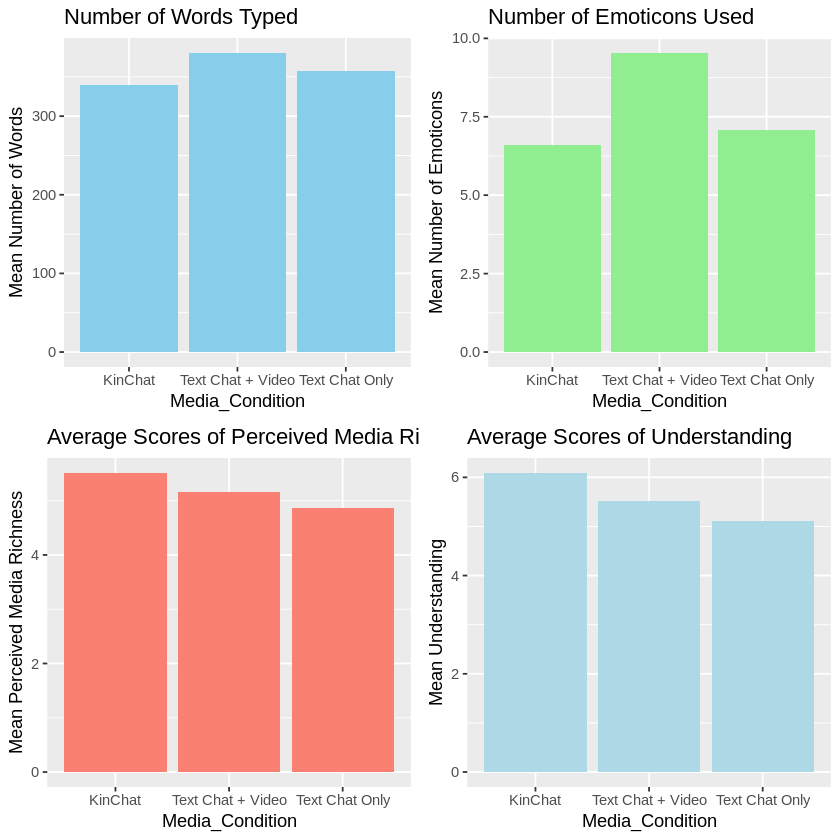

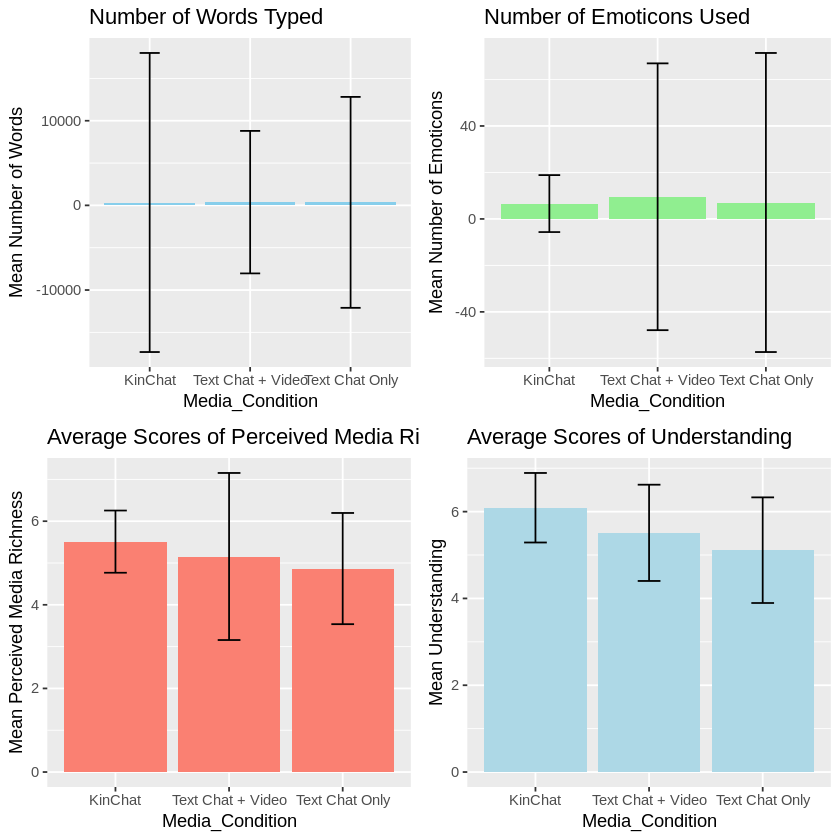

In [4]:
# Visualization
# Calculate means and variances for plotting
summary(data[, c("Number_of_Words", "Number_of_Emoticons", "Average_Richness", "Average_Understanding")])

# Create plots using correct column names
p1 <- ggplot(data, aes(x = Media_Condition, y = Number_of_Words)) +
  geom_bar(stat = "summary", fun = "mean", fill = "skyblue") +
  geom_errorbar(stat = "summary", fun.data = "mean_sdl", fun.args = list(mult = 1), width = 0.2) +
  labs(title = "Number of Words Typed", y = "Mean Number of Words")

p2 <- ggplot(data, aes(x = Media_Condition, y = Number_of_Emoticons)) +
  geom_bar(stat = "summary", fun = "mean", fill = "lightgreen") +
  geom_errorbar(stat = "summary", fun.data = "mean_sdl", fun.args = list(mult = 1), width = 0.2) +
  labs(title = "Number of Emoticons Used", y = "Mean Number of Emoticons")

p3 <- ggplot(data, aes(x = Media_Condition, y = Average_Richness)) +
  geom_bar(stat = "summary", fun = "mean", fill = "salmon") +
  geom_errorbar(stat = "summary", fun.data = "mean_sdl", fun.args = list(mult = 1), width = 0.2) +
  labs(title = "Average Scores of Perceived Media Richness", y = "Mean Perceived Media Richness")

p4 <- ggplot(data, aes(x = Media_Condition, y = Average_Understanding)) +
  geom_bar(stat = "summary", fun = "mean", fill = "lightblue") +
  geom_errorbar(stat = "summary", fun.data = "mean_sdl", fun.args = list(mult = 1), width = 0.2) +
  labs(title = "Average Scores of Understanding", y = "Mean Understanding")

# Arrange the plots in one figure
if (!require(gridExtra)) {
    install.packages("gridExtra")
    library(gridExtra)
}

library(gridExtra)
grid.arrange(p1, p2, p3, p4, ncol = 2)


# Custom function to calculate mean and variance
mean_variance <- function(x) {
  n <- length(x)
  m <- mean(x)
  v <- var(x)  # Note: var in R computes sample variance (uses n-1)
  ymin <- m - v
  ymax <- m + v
  return(c(y = m, ymin = ymin, ymax = ymax))
}


# Create bar plots with error bars showing variance for each metric
p1 <- ggplot(data, aes(x = Media_Condition, y = Number_of_Words)) +
  geom_bar(stat = "summary", fun = "mean", fill = "skyblue") +
  geom_errorbar(stat = "summary", fun.data = mean_variance, width = 0.2) +
  labs(title = "Number of Words Typed", y = "Mean Number of Words")

p2 <- ggplot(data, aes(x = Media_Condition, y = Number_of_Emoticons)) +
  geom_bar(stat = "summary", fun = "mean", fill = "lightgreen") +
  geom_errorbar(stat = "summary", fun.data = mean_variance, width = 0.2) +
  labs(title = "Number of Emoticons Used", y = "Mean Number of Emoticons")

p3 <- ggplot(data, aes(x = Media_Condition, y = Average_Richness)) +
  geom_bar(stat = "summary", fun = "mean", fill = "salmon") +
  geom_errorbar(stat = "summary", fun.data = mean_variance, width = 0.2) +
  labs(title = "Average Scores of Perceived Media Richness", y = "Mean Perceived Media Richness")

p4 <- ggplot(data, aes(x = Media_Condition, y = Average_Understanding)) +
  geom_bar(stat = "summary", fun = "mean", fill = "lightblue") +
  geom_errorbar(stat = "summary", fun.data = mean_variance, width = 0.2) +
  labs(title = "Average Scores of Understanding", y = "Mean Understanding")

# Arrange the plots in one figure using gridExtra
grid.arrange(p1, p2, p3, p4, ncol = 2)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  125.0   289.0   340.0   349.3   413.5   539.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   6.000   6.714  10.000  20.000 

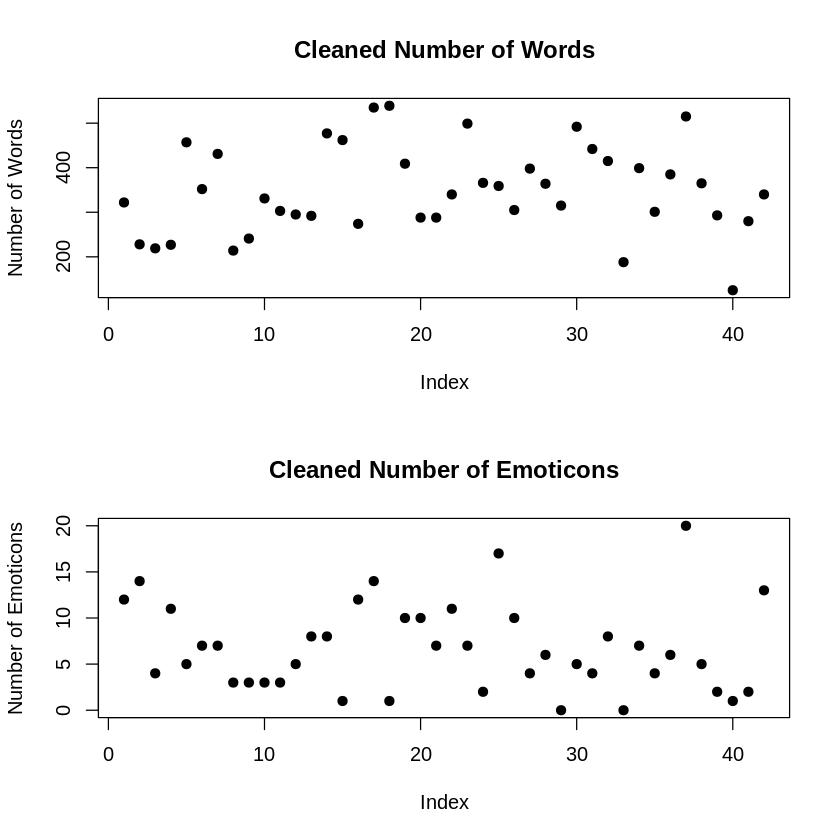

In [6]:
# Clean data
# Calculate IQR for Number_of_Words
IQR_words <- IQR(data$Number_of_Words)
Q1_words <- quantile(data$Number_of_Words, 0.25)
Q3_words <- quantile(data$Number_of_Words, 0.75)
upper_bound_words <- Q3_words + 1.5 * IQR_words
lower_bound_words <- Q1_words - 1.5 * IQR_words

# Calculate IQR for Number_of_Emoticons
IQR_emoticons <- IQR(data$Number_of_Emoticons)
Q1_emoticons <- quantile(data$Number_of_Emoticons, 0.25)
Q3_emoticons <- quantile(data$Number_of_Emoticons, 0.75)
upper_bound_emoticons <- Q3_emoticons + 1.5 * IQR_emoticons
lower_bound_emoticons <- Q1_emoticons - 1.5 * IQR_emoticons

# Identify rows with outliers
outlier_indices <- which(data$Number_of_Words < lower_bound_words | data$Number_of_Words > upper_bound_words |
                         data$Number_of_Emoticons < lower_bound_emoticons | data$Number_of_Emoticons > upper_bound_emoticons)

# Remove rows with outliers
cleaned_data <- data[-outlier_indices, ]

# Summary statistics of cleaned data
summary(cleaned_data$Number_of_Words)
summary(cleaned_data$Number_of_Emoticons)

# Visualize the cleaned data to check for outliers
par(mfrow=c(2,1))  # Layout to plot two graphs vertically
plot(cleaned_data$Number_of_Words, main="Cleaned Number of Words", xlab="Index", ylab="Number of Words", pch=19)
plot(cleaned_data$Number_of_Emoticons, main="Cleaned Number of Emoticons", xlab="Index", ylab="Number of Emoticons", pch=19)


In [16]:


shapiro.test(data$Number_of_Words)
shapiro.test(data$Number_of_Emoticons)
shapiro.test(data$Average_Richness)
shapiro.test(data$Average_Understanding)


# One-Way ANOVA by Media Condition for each metric using cleaned data
anova_words <- aov(Number_of_Words ~ Media_Condition, data = cleaned_data)
summary(anova_words)


# One-Way ANOVA by Gender for each metric using cleaned data
anova_words_gender <- aov(Number_of_Words ~ Gender, data = cleaned_data)
summary(anova_words_gender)


# Two-Way ANOVA for interaction effects between Gender and Media Condition using cleaned data
anova_words_interaction <- aov(Number_of_Words ~ Media_Condition*Gender, data = cleaned_data)
summary(anova_words_interaction)



	Shapiro-Wilk normality test

data:  data$Number_of_Words
W = 0.97041, p-value = 0.2996



	Shapiro-Wilk normality test

data:  data$Number_of_Emoticons
W = 0.83468, p-value = 1.512e-05



	Shapiro-Wilk normality test

data:  data$Average_Richness
W = 0.89835, p-value = 0.0008422



	Shapiro-Wilk normality test

data:  data$Average_Understanding
W = 0.92816, p-value = 0.008077


                Df Sum Sq Mean Sq F value Pr(>F)
Media_Condition  2  38537   19269   2.075  0.139
Residuals       39 362149    9286               

            Df Sum Sq Mean Sq F value Pr(>F)
Gender       1  19811   19811   2.081  0.157
Residuals   40 380876    9522               

                       Df Sum Sq Mean Sq F value Pr(>F)
Media_Condition         2  38537   19269   2.178  0.128
Gender                  1  23616   23616   2.670  0.111
Media_Condition:Gender  2  20079   10040   1.135  0.333
Residuals              36 318454    8846               

[1] "Correlation between Number of Words and Number of Emoticons:"

	Pearson's product-moment correlation

data:  cleaned_data$Number_of_Words and cleaned_data$Number_of_Emoticons
t = 1.3263, df = 40, p-value = 0.1923
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1052513  0.4792794
sample estimates:
      cor 
0.2052457 

[1] "Correlation between Perceived Media Richness and Understanding Scores:"

	Pearson's product-moment correlation

data:  cleaned_data$Average_Richness and cleaned_data$Average_Understanding
t = 3.0874, df = 40, p-value = 0.00366
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1554745 0.6552458
sample estimates:
      cor 
0.4386768 

[1] "Correlations between Communication Metrics and Gender:"
$Words

	Pearson's product-moment correlation

data:  cleaned_data$Number_of_Words and cleaned_data$GenderNumeric
t = -1.4424, df = 40, p-value = 0.157
alternative hypothesis: true 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


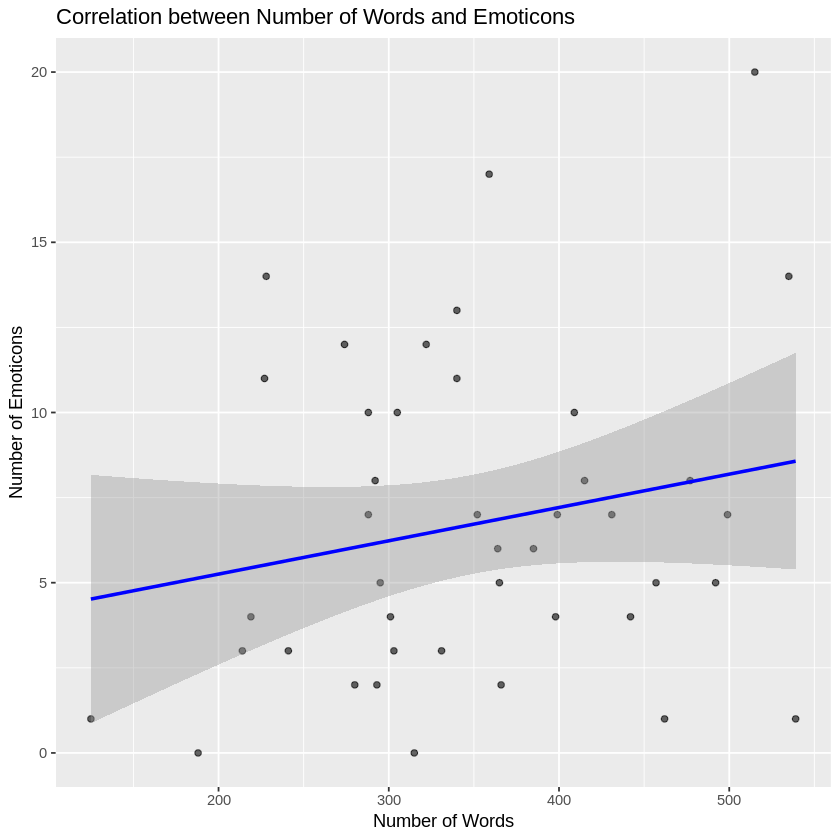

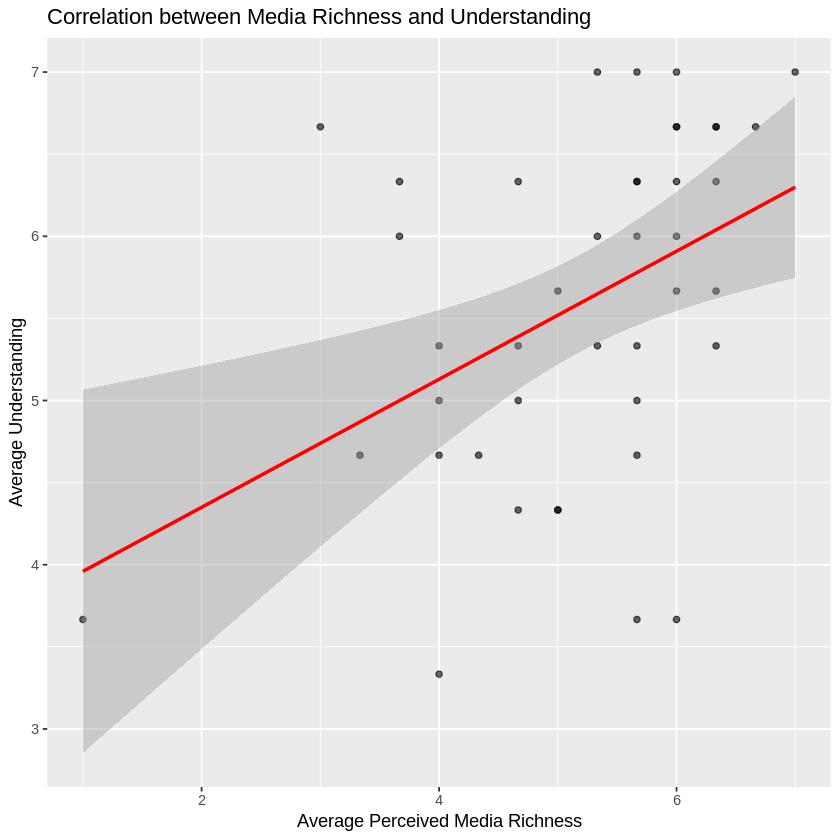

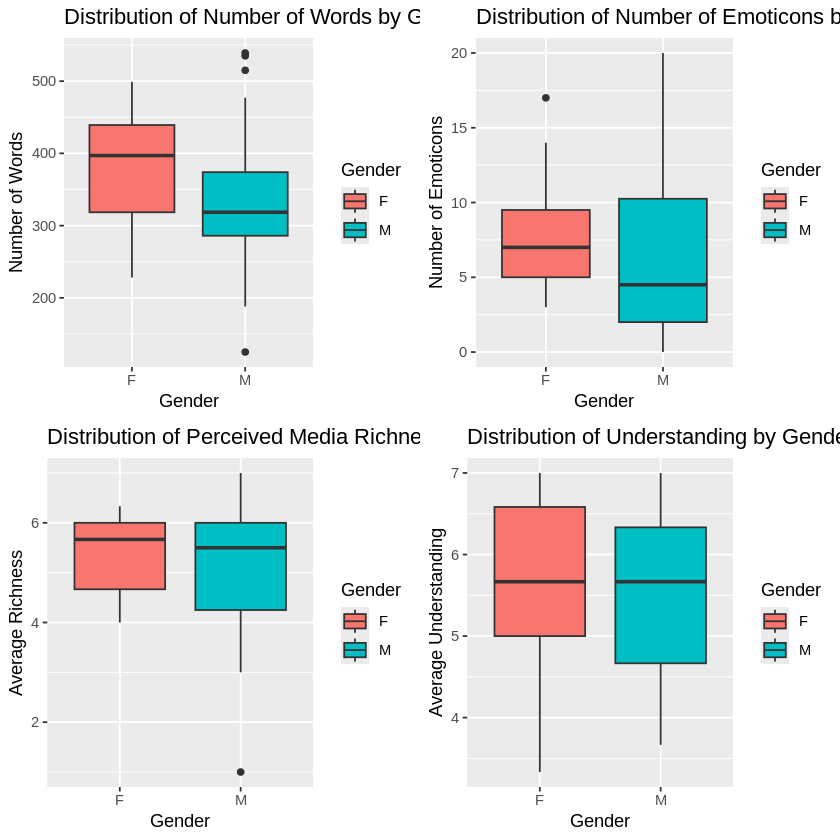

In [21]:
# between subject
# non- normal distribution
if (!require(Hmisc)) install.packages("Hmisc")
library(Hmisc)

# Convert 'Gender' from M/F to numeric (1 for M, 0 for F)
cleaned_data$GenderNumeric <- as.numeric(cleaned_data$Gender == "M")

# I. Correlation between number of words and number of emoticons
correlation_words_emoticons <- cor.test(cleaned_data$Number_of_Words, cleaned_data$Number_of_Emoticons, method = "pearson")
print("Correlation between Number of Words and Number of Emoticons:")
print(correlation_words_emoticons)

# II. Correlation between perceived media richness and understanding scores
correlation_richness_understanding <- cor.test(cleaned_data$Average_Richness, cleaned_data$Average_Understanding, method = "pearson")
print("Correlation between Perceived Media Richness and Understanding Scores:")
print(correlation_richness_understanding)

# III. Correlation between four communication metrics and gender (point-biserial correlation)
correlation_words_gender <- cor.test(cleaned_data$Number_of_Words, cleaned_data$GenderNumeric, method = "pearson")
correlation_emoticons_gender <- cor.test(cleaned_data$Number_of_Emoticons, cleaned_data$GenderNumeric, method = "pearson")
correlation_richness_gender <- cor.test(cleaned_data$Average_Richness, cleaned_data$GenderNumeric, method = "pearson")
correlation_understanding_gender <- cor.test(cleaned_data$Average_Understanding, cleaned_data$GenderNumeric, method = "pearson")

print("Correlations between Communication Metrics and Gender:")
print(list(
  Words = correlation_words_gender,
  Emoticons = correlation_emoticons_gender,
  Richness = correlation_richness_gender,
  Understanding = correlation_understanding_gender
))

library(ggplot2)

# Scatter plot with a linear model fit
p1 <- ggplot(cleaned_data, aes(x = Number_of_Words, y = Number_of_Emoticons)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Correlation between Number of Words and Emoticons",
       x = "Number of Words", y = "Number of Emoticons")

# Display the plot
print(p1)

p2 <- ggplot(cleaned_data, aes(x = Average_Richness, y = Average_Understanding)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", col = "red") +
  labs(title = "Correlation between Media Richness and Understanding",
       x = "Average Perceived Media Richness", y = "Average Understanding")

print(p2)

# Number of Words vs Gender
p3 <- ggplot(cleaned_data, aes(x = Gender, y = Number_of_Words, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Distribution of Number of Words by Gender", y = "Number of Words")

# Number of Emoticons vs Gender
p4 <- ggplot(cleaned_data, aes(x = Gender, y = Number_of_Emoticons, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Distribution of Number of Emoticons by Gender", y = "Number of Emoticons")

# Perceived Media Richness vs Gender
p5 <- ggplot(cleaned_data, aes(x = Gender, y = Average_Richness, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Distribution of Perceived Media Richness by Gender", y = "Average Richness")

# Understanding vs Gender
p6 <- ggplot(cleaned_data, aes(x = Gender, y = Average_Understanding, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Distribution of Understanding by Gender", y = "Average Understanding")

# Arrange plots in a grid
library(gridExtra)
grid.arrange(p3, p4, p5, p6, nrow = 2, ncol = 2)



[1] "Average_Understanding =  4.3006 - 0.0011 * Number_of_Words + 0.0057 * Number_of_Emoticons + 0.3654 * Average_Richness + 0.1759 * GenderM - 0.4634 * Media_ConditionText Chat + Video - 0.6214 * Media_ConditionText Chat Only"


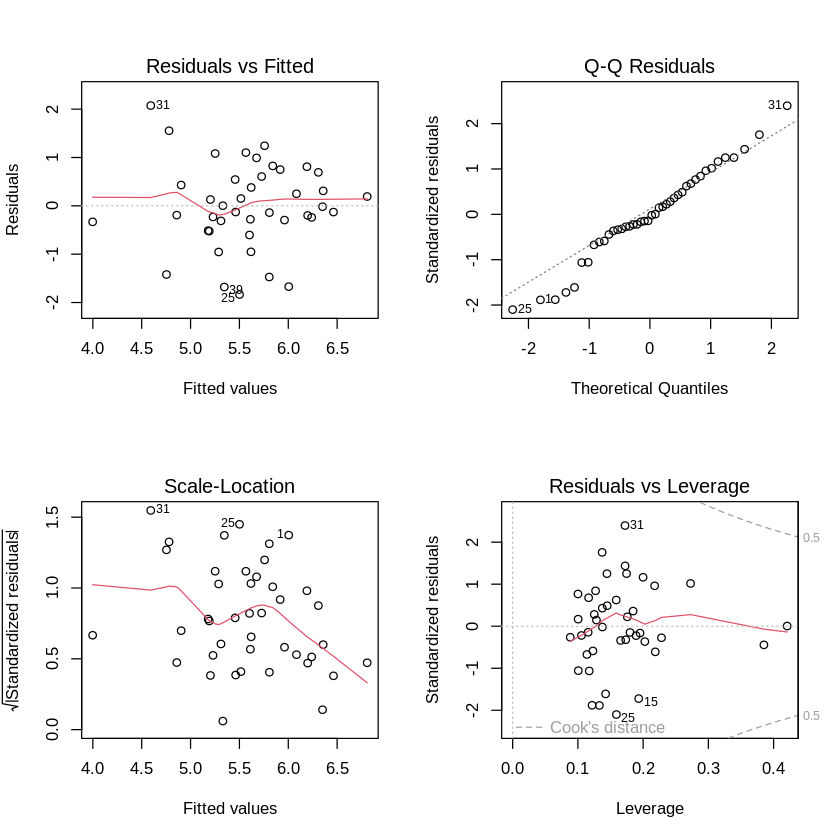

In [24]:
# Regression Analysis

cleaned_data$Gender <- as.factor(cleaned_data$Gender)
cleaned_data$Media_Condition <- as.factor(cleaned_data$Media_Condition)

# Linear Regression Model
model <- lm(Average_Understanding ~ Number_of_Words + Number_of_Emoticons +
            Average_Richness + Gender + Media_Condition, data = cleaned_data)
model_summary <- summary(model)

coefficients <- model_summary$coefficients
intercept <- coefficients[1, 1]  # Extracting the intercept

# Constructing the regression equation
equation <- paste("Average_Understanding = ", round(intercept, 4))
for (i in 2:nrow(coefficients)) {
  coef_name <- rownames(coefficients)[i]
  coef_value <- coefficients[i, 1]
  sign <- ifelse(coef_value >= 0, "+", "-")
  equation <- paste(equation, sign, round(abs(coef_value), 4), "*", coef_name)
}
print(equation)

# Diagnostic Plots
par(mfrow=c(2,2))  # Layout for plots
plot(model)  # Diagnostic plots


